# Medical Data Visualizer

### Importing, Evaluating, and Manipulating Data

In [2]:
# Load necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import data
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Get information about the column names, data type, and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### Generating overweight column

In [5]:
# Calculate for BMI.
# BMI = weight(kg)/(height(m))^2
# The height is in centimeters, so convert first to meters.
# Assign this calculated value to BMI column
df = df.assign(BMI = df.weight/((df.height/100)**2))
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [6]:
# Create overweight column from BMI values
# Overweight = True when BMI > 25.
# Convert to boolean to integer.
df['overweight'] = (df['BMI'] > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [7]:
# This is my initial solution, but have seen a shorter solution.
# I made a mistake here initially where astype(int) applied to the whole dataframe
'''
df = df.assign(overweight=(df['BMI'] > 25).astype(int)) # astype() was initially on the outermost nest
df.head() 
'''

"\ndf = df.assign(overweight=(df['BMI'] > 25).astype(int)) # astype() was initially on the outermost nest\ndf.head() \n"

In [8]:
# Drop the BMI column as it is no longer needed.
# Under the label "BMI", a  column label in axis = 1, drop the corresponding values.
df = df.drop('BMI', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.2 MB


#### Normalizing the values in `gluc` and `cholesterol` column 

In [9]:
# Normalize the values in gluc.
# The value should be 0 when good and 1 when bad. 
# In the gluc column, if the values is more than 1, yield 1. Otherwise, yield 0.
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0


In [10]:
# Normalize the values in cholesterol.
# The value should be 0 when good and 1 when bad. 
# In the cholesterol column, if the values is more than 1, yield 1. Otherwise, yield 0.
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Draw Categorical Plot

#### Convert dataframe into a long table to make the plot

In [11]:
# Create DataFrame for cat plot using `pd.melt` 
# Using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
# pd.melt is similar to a pivot table. 
# This converts the dataframe into a long table.
# Use "cardio" as the identifier. 
# Unpivot the variables inside value_vars=[...]. This will create another column with their corresponding values. 
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc','overweight', 'smoke'])
df_cat.head() # I noticed that the order in the value_vars is how they will appear in the the df and plot.

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


In [12]:
# Sort the values by the values of "cardio" and "variable" columns.
# I have no idea why splitting by cardio since the argument col='cardio' in the sns.catplot already does this.
# This alphabetizes the labels in the x-axis later.
df_cat = df_cat.sort_values(by=['cardio', 'variable']) 
df_cat.head()

,cardio,variable,value
0,0,active,1
4,0,active,0
5,0,active,0
6,0,active,1
8,0,active,1


#### Draw the catplot with `sns.catplot()`

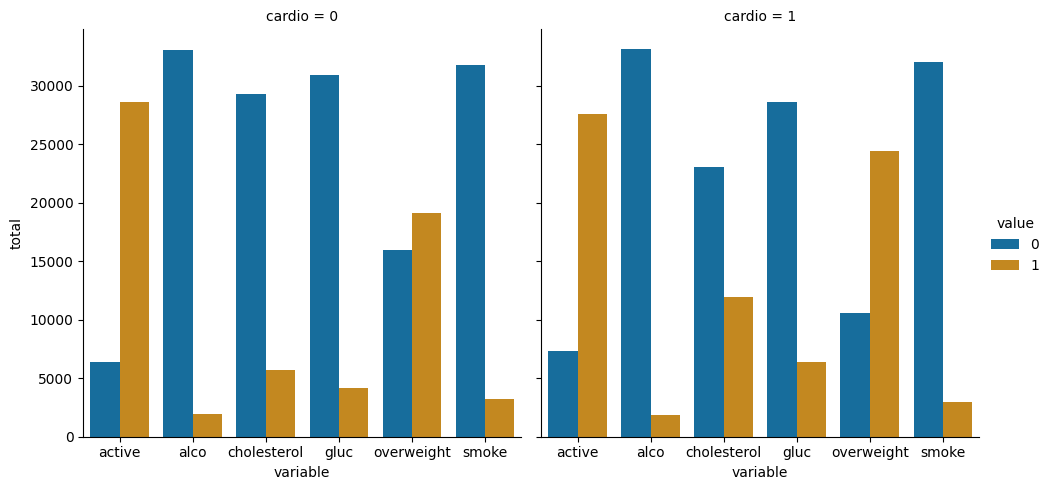

In [13]:
# Make a plot using the df_cat dataframe
# Make two subplots separate by the values in the cardio column
# With the variable column in the x-axis
# In each category/label in the x-axis, count the number of "0" and "1" values based on the "value" column.
# Use the colorblind palette for accessibility. 
# Set the label in the y-axis as "total"
catplot = sns.catplot(
    data = df_cat,
    col = 'cardio', x = 'variable', hue ='value',
    kind = 'count', palette = 'colorblind',)
catplot.set(ylabel = 'total')

In [14]:
# Create a new figure and set the figure size (width, height) in inches.
fig = plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

In [15]:
# Access the catplot figure and then save in the working directory.
fig = catplot
fig.savefig('catplot.png')

### Draw Heat Map

#### Clean the data

##### Checking if the my attempt at filtering is right

In [16]:
# Filter out the patients with height less than the 2.5th percentile and more than the 97.5th percentile
df_temp = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]
df_temp.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [17]:
# This is the range for the filtered data.
np.sort(df_temp.height.unique())

array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180], dtype=int64)

In [18]:
# This is referring to the data that is filtered out.
# This displays the possible values of height.
np.sort(df['height'][(df['height'] < df['height'].quantile(0.025)) | (df['height'] > df['height'].quantile(0.975))].unique())

array([ 55,  57,  59,  60,  64,  65,  66,  67,  68,  70,  71,  72,  74,
        75,  76,  80,  81,  91,  96,  97,  98,  99, 100, 104, 105, 108,
       109, 110, 111, 112, 113, 117, 119, 120, 122, 125, 128, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 207, 250],
      dtype=int64)

In [19]:
# Delete the temporary dataframe.
del df_temp

##### Filtering the data

In [20]:
# Initially, I made the filtering separate from each other.
# However, I realized that when the patients are dropped this also affects affected by quantile().
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & # filters out patients with diastolic pressure higher than systolic
            (df['height'] >= df['height'].quantile(0.025)) & # filters out patients with height above the 2.5th percentile
            (df['height'] <= df['height'].quantile(0.975)) & # filters out patients with height above the 97.5th percentile
            (df['weight'] >= df['weight'].quantile(0.025)) & # filters out patients with weight above the 2.5th percentile
            (df['weight'] <= df['weight'].quantile(0.975))] # filters out patients with weight above the 97.5th percentile

#### Setting up the heat map

In [21]:
# Generate a correlation matrix from df_heat dataframe
corr = df_heat.corr()

In [22]:
# Create a upper triangle mask variable
# Make an array in the same shape as corr array and fill ith with "1"
# Return an array with only the upper triangle values. 
mask = np.triu(np.ones_like(corr))

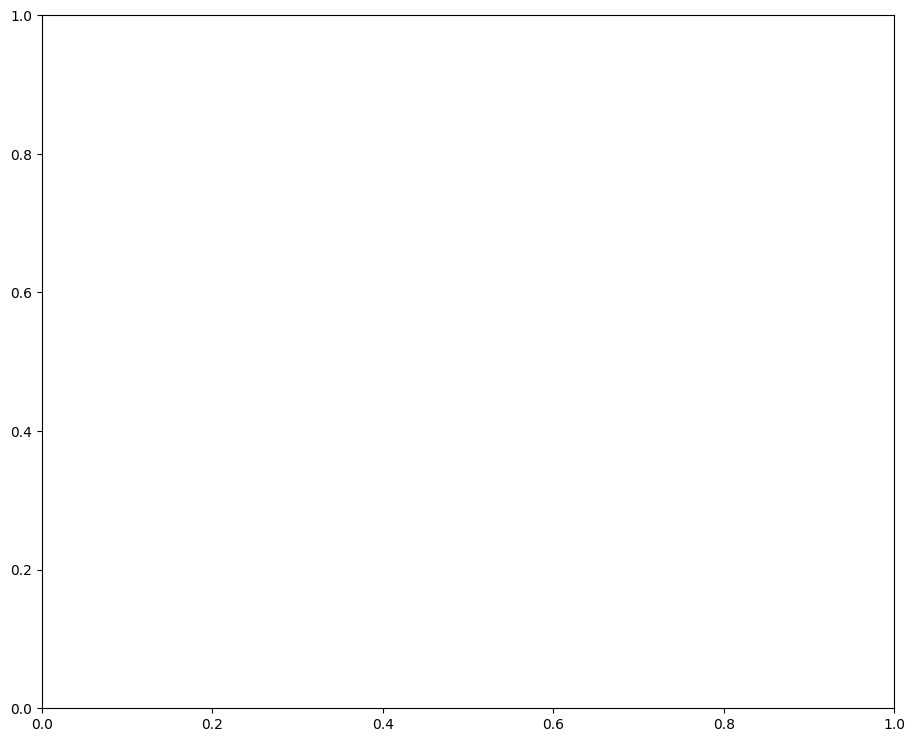

In [23]:
# Create a new figure and a single axes object and set the figure size (width, height) in inches.
# I do not really understand the ax part, but based on what I read, the catplot and heatmap handles the process differently.
fig, ax = plt.subplots(figsize=(11, 9))

I changed the color map from my earlier attempt to `viridis` for better accessibility based on the paper of [Nuñez et al. (2018)](https://doi.org/10.1371/journal.pone.0199239). The `cividis` color map also exists but does not look as appealing.

<Axes: >

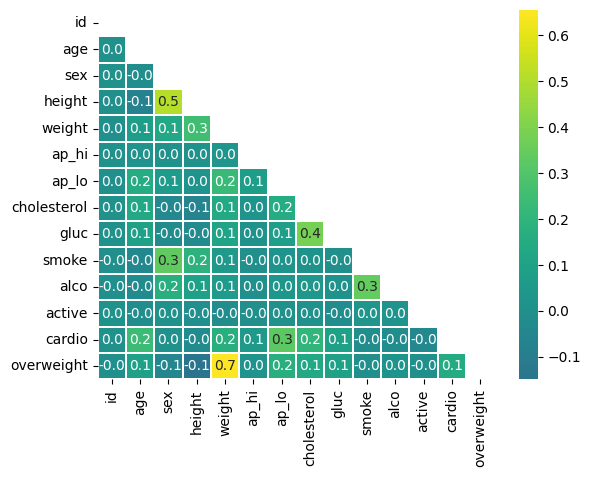

In [24]:
# Draw the heatmap plot using the corr dataframe.
# Center the colormap values at 0.
# Apply the mask from earlier.
# Annotate with the correlation coeffient values but only with 1 decimal values.
# Specify the widht of line that separates each cells.
# Set the colormap to "viridis" 
sns.heatmap(corr, center=0, mask=mask, annot=True, fmt=".1f", linewidth=0.05, cmap='viridis')

In [25]:
# Save the heatmap figure in the working directory
fig.savefig('heatmap.png')